In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [6]:
sep_coins = cv2.imread('../numpy_images/pennies.jpg')

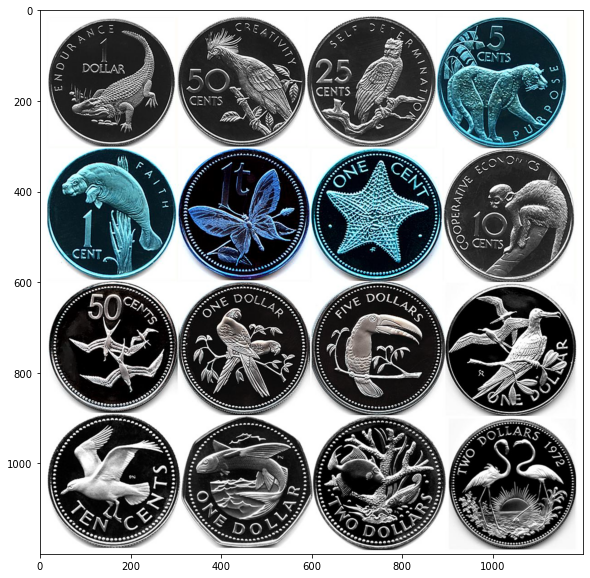

In [7]:
display(sep_coins)

In [8]:
# Medium Blur
# Grayscale
# Binary Threshold
# FInd Contours

In [9]:
sep_blur = cv2.medianBlur(sep_coins,25)

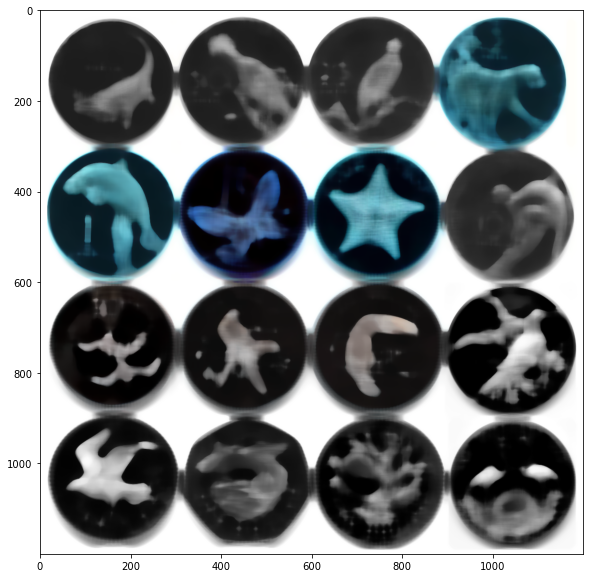

In [10]:
display(sep_blur)

In [11]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

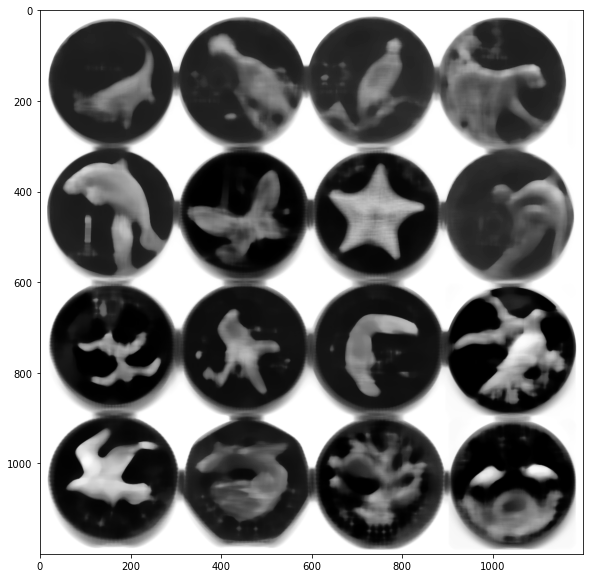

In [12]:
display(gray_sep_coins)

In [37]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,200,255,cv2.THRESH_BINARY_INV)

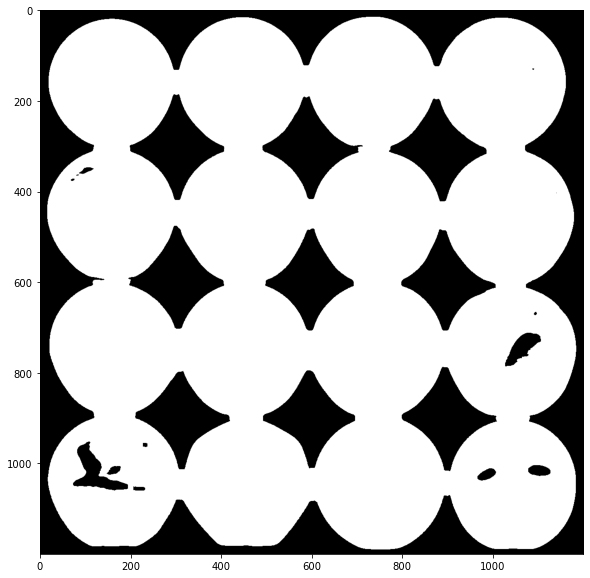

In [38]:
display(sep_thresh)

In [40]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [41]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

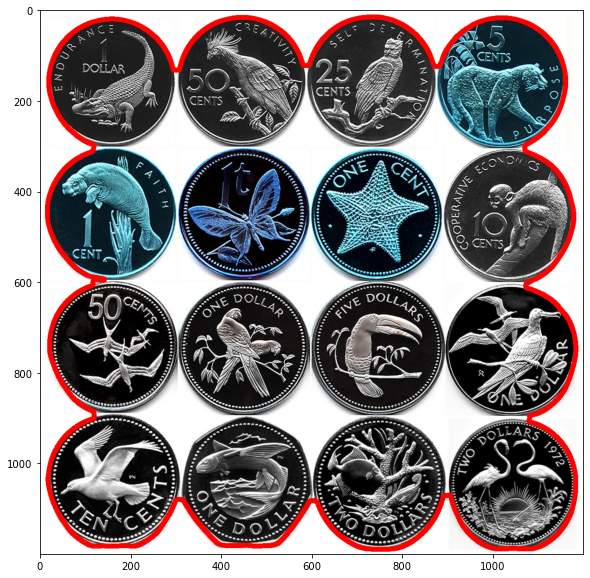

In [42]:
display(sep_coins)

In [316]:
img = cv2.imread('../numpy_images/pennies.jpg')

In [317]:
img = cv2.blur(img,ksize=(45,45))

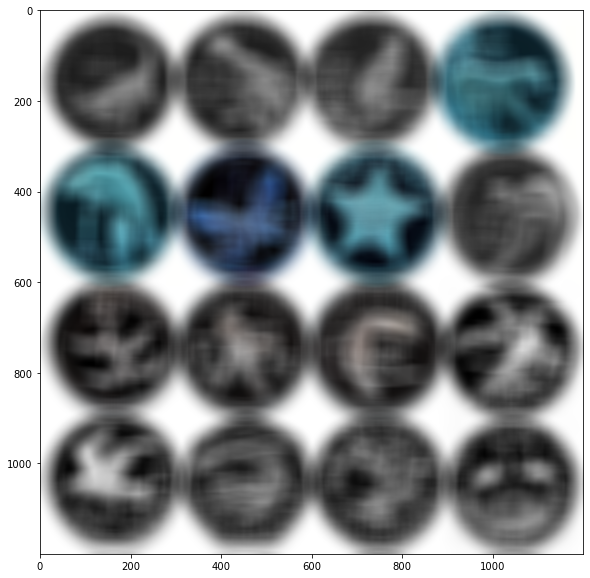

In [318]:
display(img)

In [319]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [320]:
ret,thresh = cv2.threshold(gray,220,255,cv2.THRESH_BINARY_INV)
#ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

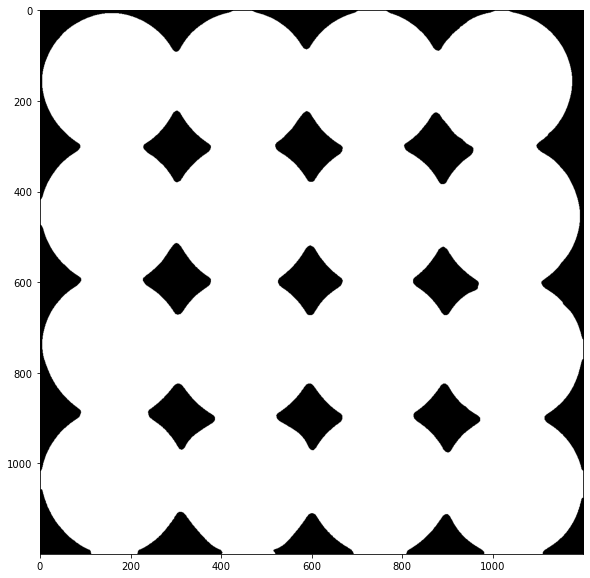

In [321]:
display(thresh)

In [322]:
# NOISE REMOVAL (OPTIONAL)

In [323]:
kernel = np.ones((3,3),np.uint8)

In [324]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [325]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=4)

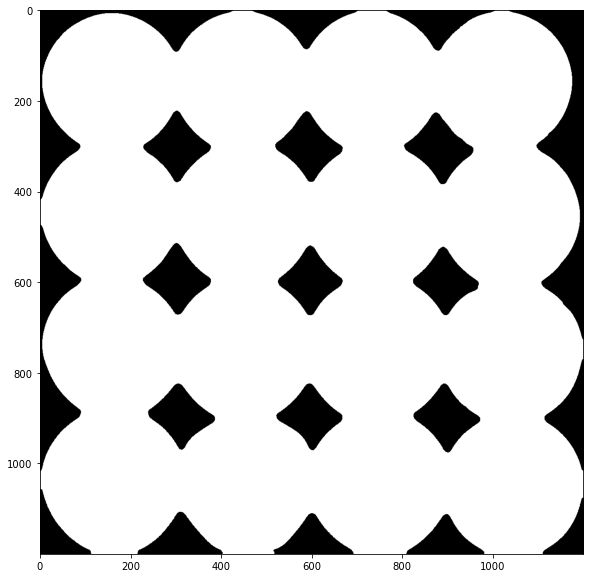

In [326]:
display(opening)

In [350]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

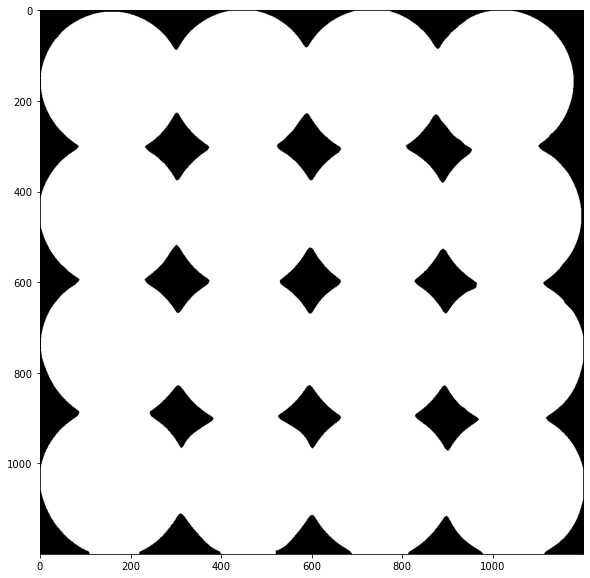

In [351]:
display(sure_bg)

In [352]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

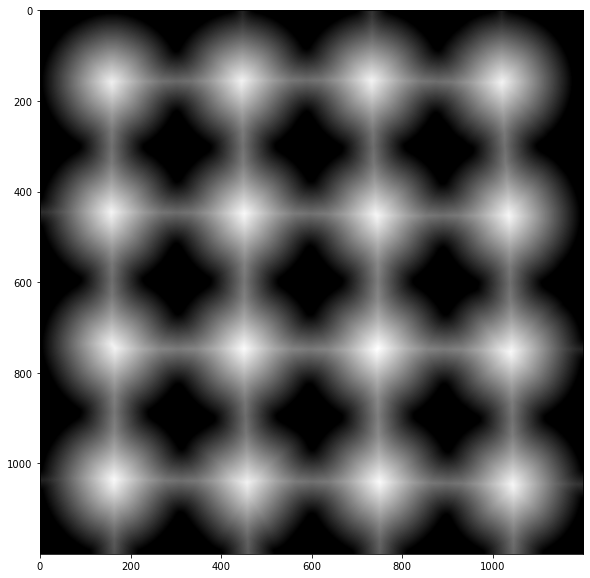

In [353]:
display(dist_transform)

In [354]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

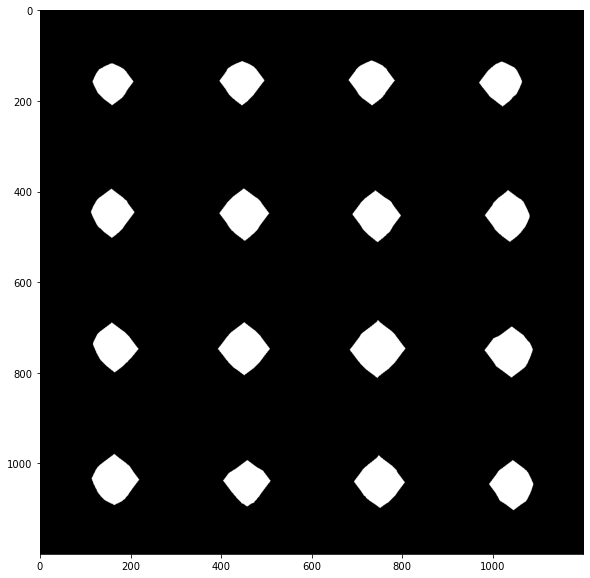

In [355]:
display(sure_fg)

In [356]:
sure_fg = np.uint8(sure_fg)

In [357]:
unknown = cv2.subtract(sure_bg,sure_fg)

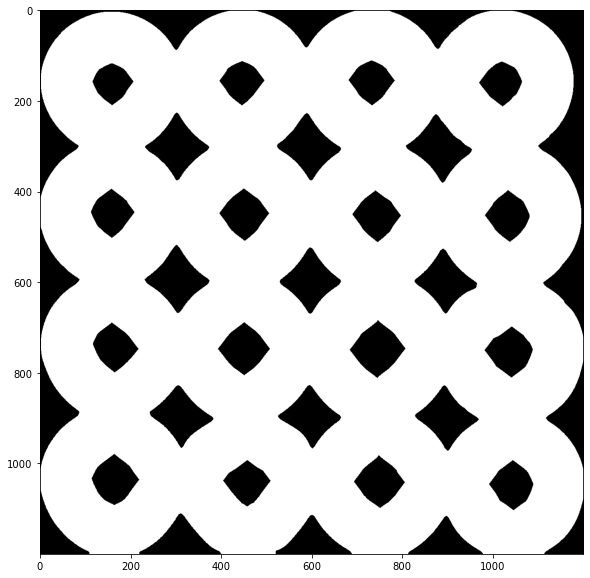

In [358]:
display(unknown)

In [359]:
ret, markers = cv2.connectedComponents(sure_fg)

In [360]:
markers = markers + 1

In [361]:
markers[unknown==255] = 0

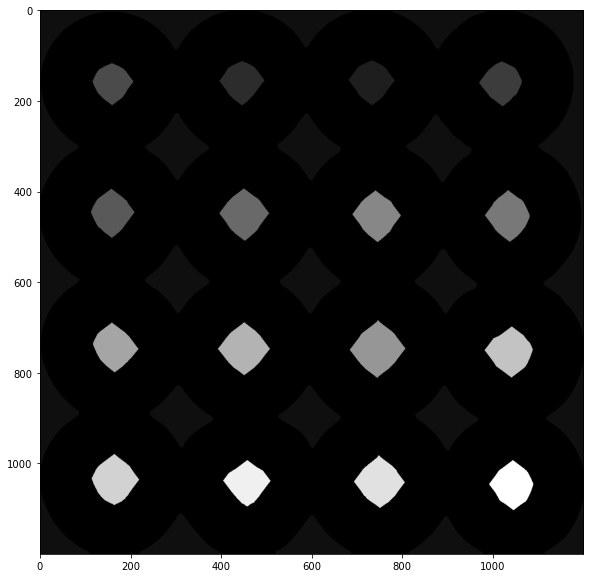

In [362]:
display(markers)

In [363]:
markers = cv2.watershed(img,markers)

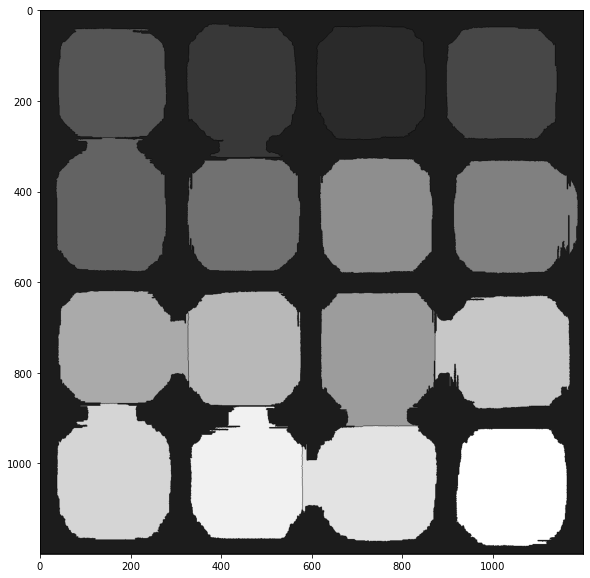

In [364]:
display(markers)

In [365]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

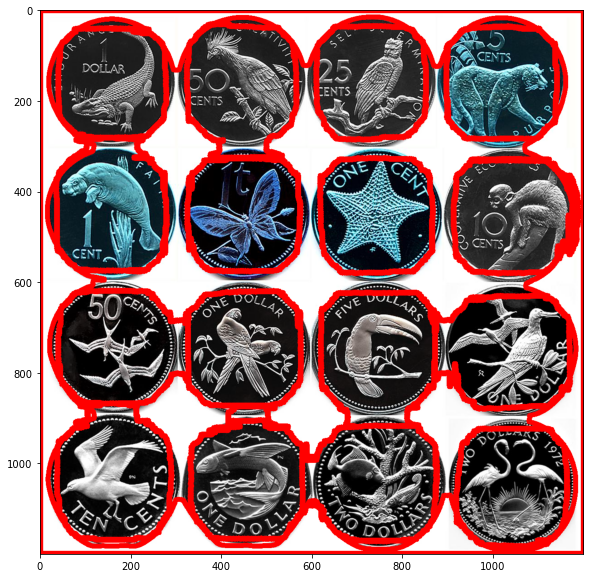

In [366]:
display(sep_coins)